## DPEE 1072
### BUCK in DCM
#### Prof. Humberto Pinheiro,Ph.D.

In [1]:
import numpy as np
from numpy import pi
from scipy import sqrt, exp, cos, matrix, vstack, hstack, zeros
from scipy.linalg import block_diag
import matplotlib.pyplot as plt
import mpld3
import math as m
import cmath
import sympy as sp
sp.init_printing()

Input Data

In [2]:
Prated=200
E1=300
E2=120   
fsw=100000
T=1/fsw
print ( ' fsw=', fsw/1000,'kHz')
print ( ' T=', T*10**6,'us')

 fsw= 100.0 kHz
 T= 10.0 us


In [3]:
dmax=E2/E1
print ('dmax=',dmax)

dmax= 0.4


Selected duty cyle

In [4]:
d=0.35

 Inductance value

In [5]:
L=E1*(E1-E2)*d**2*T/2/Prated
print( 'L=',L*1000000,'uH')

L= 165.375 uH


RMS Current on the MOSFET

In [6]:
Irms=(E1-E2)*T/L*sqrt(d**3/3)
print('Irms_MOSFET=',Irms,'A')

Irms_MOSFET= 1.3012000972647109 A


Other operating points

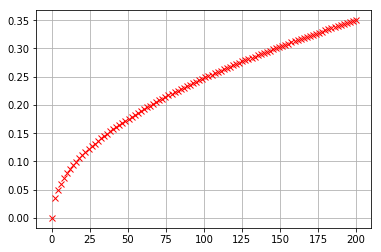

In [7]:
p = np.linspace(0, Prated, 100)
d=sqrt( p*2*L/(E1*(E1-E2)*T) )
mpld3.enable_notebook()
plt.grid()
plt.plot(p,d,'rx')

### Output Capacitance
#### 1) The maximum allowed output voltage ripple is usually given
#### 2) In DC Steady State the dc component of the current trough the capacitor is zero
#### 3) The Capacitance can be defined form the capacitor current waveform

### Frequency domain approach
##### For a given frequency componant of current through the capacitor the corresponding voltage is found as
$${V_{ac}} =  - j{X_c}{I_{ac}}$$
#### and their magnitude can be expressed as
$$\left| {{V_{ac}}} \right| = {X_c}\left| {{I_{ac}}} \right|$$
#### where
$${X_c} = \frac{1}{{2\pi fC}}$$
#### and $f$ is the frenquency of the consired frequency component


Example 1

In [8]:
C=10*10**-6
print( 'C=',C*1000000, 'uF')

C= 10.0 uF


then

In [9]:
Xc=1/(2*pi*fsw*C)
print ( 'Xc=',Xc, 'ohms')

Xc= 0.15915494309189537 ohms


From the simulation it is possible to find the amplitude of the current component @fsw through the capacitor

In [10]:
Iac=1.68
print( 'Iac=',Iac,'A @',fsw/1000,'kHz')

Iac= 1.68 A @ 100.0 kHz


Then the peak to peak ac component of the capacitor voltage is: 

In [11]:
Vca_p2p=Xc*Iac*2
print ( 'Vca_p2p=',Vca_p2p,'V @',fsw/1000,'kHz')

Vca_p2p= 0.5347606087887684 V @ 100.0 kHz


The voltage ripple as a percetage of the output dc component is

In [12]:
Ripple=Vca_p2p/E2*100
print ( 'The peak to peak voltage ripple =', Ripple,'%')

The peak to peak voltage ripple = 0.445633840657307 %


Example 2

Let us consider in the above example that the maximum allowed ripple is 

In [13]:
Ripple=1
print ( 'Maximum allowed output capacitor voltage ripple =',Ripple,'%')

Maximum allowed output capacitor voltage ripple = 1 %


In [14]:
Vca_p2p=Ripple/100*E2
print ( 'Maximum allowed output capacitor voltage ripple =',Vca_p2p,'V peak to peak')

Maximum allowed output capacitor voltage ripple = 1.2 V peak to peak


From the simulation, file buck_dcm_0.psimsch, it is possible to find that capacitor current component at fsw using the FFT fuction, that is:


In [15]:
Iac=1.68

Therefore

In [16]:
Xc=Vca_p2p/(2*Iac)
print ( 'Xc=',Xc, 'ohms')

Xc= 0.35714285714285715 ohms


In [17]:
C=1/(2*pi*fsw*Xc)
print ( ' C=', C*10**6, 'uF')

 C= 4.45633840657307 uF


## Output capacitor current component by means of Fourier Series

For a buck opeating in DCM the current through the output capacitor is:

$$i_{ac}(t) = \left\{ {\begin{array}{*{20}{c}}
{ - {I_{av}} + \frac{{({E_1} - {E_2})}}{L}t}&{for}&{0 \le t \le dT}\\
{( - {I_{av}} + \frac{{({E_1} - {E_2})}}{L}dT) - \frac{{{E_2}}}{L}(t - dT)}&{for}&{dT \le t \le {t_1}}\\
{ - {I_{av}}}&{for}&{{\rm{ }}{t_1} \le t \le T}
\end{array}} \right.$$

where

$${I_{av}} = \frac{{{P_{rated}}}}{{{E_2}}}$$

and

$${t_1} = \frac{{{E_1}}}{{{E_2}}}dT$$

In [18]:
d=0.35
Iav=Prated/E2
t1=E1/E2*d*T
t=sp.symbols('t')
ia_s1=-Iav+(E1-E2)/L*t
ia_s1
ia_s2=ia_s1.subs(t,d*T)-E2/L*(t-d*T)
ia_s2
ia_s3=-Iav

Since $i_{ac}$ is periodic with period $T$, its harmonic component can be obtained from the Fourier Series

The hamonic component at $f_{sw}$ is:
$${I_{ac}} = \sqrt {{{({I_{ac\_\cos }})}^2} + {{({I_{ac\_\sin }})}^2}} $$

where
$$\begin{array}{l}
{I_{ac\_\cos }} = \frac{2}{T}\int_0^T {{i_{ac}}} (t)\cos (\frac{{2\pi }}{T}t)dt\\
{I_{ac\_\sin }} = \frac{2}{T}\int_0^T {{i_{ac}}} (t)\sin (\frac{{2\pi }}{T}t)dt
\end{array}$$

In [19]:
Iac_cos1=2/T*( sp.integrate(ia_s1*sp.cos(2*pi/T*t),(t,0,d*T) ) )
Iac_cos2=2/T*( sp.integrate(ia_s2*sp.cos(2*pi/T*t),(t,d*T,t1)) )
Iac_cos3=2/T*( sp.integrate(ia_s3*sp.cos(2*pi/T*t),(t,t1,T ) ) ) 
Iac_cos=Iac_cos1+Iac_cos2+Iac_cos3

Iac_sin1=2/T*( sp.integrate(ia_s1*sp.sin(2*pi/T*t),(t,0,d*T) ) )
Iac_sin2=2/T*( sp.integrate(ia_s2*sp.sin(2*pi/T*t),(t,d*T,t1)) )
Iac_sin3=2/T*( sp.integrate(ia_s3*sp.sin(2*pi/T*t),(t,t1,T ) ) ) 
Iac_sin=Iac_sin1+Iac_sin2+Iac_sin3
Iac=sp.sqrt(Iac_sin**2+Iac_cos**2)
print( 'Iac=', Iac, 'A  @',fsw/1000,'kHz')

Iac= 1.68330076223817 A  @ 100.0 kHz


### Lets us find the amplitude of the output voltage ripple peak to peak  in time domain

$${v_c} = C\frac{{d{i_c}}}{{dt}}$$
or
$${v_c}(t) = {v_c}({t_o}) + \int_{{t_o}}^t {{i_c}(t)dt}$$

Let $t_0$ be the time instant when the capacitor current transiton from negative to positive 
and $t_2$ be the time instant when the capaticor current transition from positive to nevative within the periot T

$$\begin{array}{l}
{v_c}({t_2}) - {v_c}({t_o}) = \Delta V = C\int_{{t_o}}^{{t_2}} {{i_c}(t)dt} \\
\Delta Q = \int_{{t_o}}^{{t_2}} {{i_c}(t)dt} \\
\Delta Q = C\Delta V
\end{array}$$

First let us find $t_0$ by soving the equation that governs the capcitor current, that is:
$$ { - {I_{av}} + \frac{{({E_1} - {E_2})}}{L}t_0}=0$$



In [20]:
t0=Iav*L/(E1-E2)
print( t0*10**6 ,'us')

1.53125 us


First let us find $t_2$ by soving the equation that governs the capcitor current in the second stage, that is: 
$${( - {I_{av}} + \frac{{({E_1} - {E_2})}}{L}dT) - \frac{{{E_2}}}{L}(t_2 - dT)=0}$$

In [21]:
t2=(-Iav+(E1-E2)/L*d*T)*L/E2+d*T
print( t2*10**6 ,'us')

6.453125 us


In [22]:
Delta_Q=( sp.integrate(ia_s1,(t,t0,d*T)) + sp.integrate(ia_s2,(t,d*T,t2)) )
Delta_V=Delta_Q/C
print ( 'Ripple peak to peak =',Delta_V,'V')
print ( 'Ripple =',Delta_V/E2*100,'%')

Ripple peak to peak = 1.18335660779749 V
Ripple = 0.986130506497912 %


## Input Filter Design

#### The second order LC input filter is used to attenuate the current harmonics drawn by the converter from the input. The design procedure considered has three steps. 
          1) First the capacitor is selected to keep the ac component of t the voltage across the capacitor smaller then a predefiend value
          2) Then, the inductor is selected to make the input current 
          3) The damping resistor is design 

The ac current drawn by the Buck converter, in DCM, from the input source is:

$${i_{ac E1}} = \left\{ {\begin{array}{*{20}{c}}
{ - {I_{av1}} + \frac{{({E_1} - {E_2})}}{L}t}&{0 \le t \le dT}\\
{ - {I_{av1}}}&{dT \le t \le T}
\end{array}} \right.$$

where

$${I_{av1}} = \frac{{{P_{rated}}}}{{{E_1}}}$$

 Let us assume that this ac current circulates interely through the input filter capacitor, $C_1$, then, it possible to compute the resulting ac voltage across the input capacitor.
 
$${i_{c1}} = {i_{acE1}}$$

$$\begin{array}{l}
{v_{c1}}({dT}) - {v_{c1}}({t_3}) = \Delta V_{c1} = C_{in}\int_{{t_3}}^{{dT}} {{i_{c1}}(t)dt} \\
\Delta Q_{c1} = \int_{{t_3}}^{{dT}} {{i_{c1}}(t)dt} \\
\Delta Q_{c1} = C_{in}\Delta V_{c1}
\end{array}$$

where $t_3$ id the instant when the input capacitor current, ${i_{c1}}$, crosses zero within the first stage of operation, therefore

$${t_3} = \frac{{{I_{av1}}L}}{{({E_1} - {E_2})}}$$

In [23]:
Iav1=Prated/E1
print ('Average current drawn from the input, Iav1=', Iav1,'A')

Average current drawn from the input, Iav1= 0.6666666666666666 A


In [24]:
t3=Iav1*L/(E1-E2)
print ( 't3=',t3*10**6,'us')

t3= 0.6124999999999999 us


In [25]:
ic1_1=-Iav1+(E1-E2)/L*t;
ic1_1

In [26]:
DeltaQ1=sp.integrate(ic1_1,(t,t3,d*T))
print(' DelatQ=',DeltaQ1*10**6,'uC')

 DelatQ= 4.53750000000000 uC


Now, for a given specification of input capacitor voltage rippple it is possible to compute $C_1$, for example 

In [27]:
Ripple_v1=5 
Vac1_p2p=Ripple_v1/100*E1
print ( 'Vac1_p2p =',Vac1_p2p,'V')

Vac1_p2p = 15.0 V


The capacitance required to make the voltage ripple at this value is:

In [28]:
Cin=DeltaQ1/Vac1_p2p
print (' Cin=',Cin*10**6,'uF')

 Cin= 0.302500000000000 uF


Now, let us define the inductor of the input filter. In order to simplify the design it is reasable to assume that $V_{ac1 p2p}$ is harmonic amplitude at the frequency $f_{sw}$. This alternate component will result in a current ripple at the input of the following amplitude:

$${I_{Lin\_ac}} = \frac{{{V_{ac1\_p2p}}}}{{{X_L}}} = \frac{{{V_{ac1\_p2p}}}}{{\frac{{2\pi }}{T}L}}$$

As a result, for a given ${I_{Lin\_ac}}$ the inductance of the inductor can be computed as:

$$L_{in} = \frac{{{V_{ac1\_p2p}}}}{{\frac{{2\pi }}{T}{I_{Lin\_ac}}}}$$

If the acceptable input current ripple is given, then:
$$L_{in} = \frac{{{V_{ac1\_p2p}}}}{{\frac{{2\pi }}{T}\frac{{Ripple\_Iin}}{{100}}{I_{av1}}}}$$

In [29]:
Ripple_Iin=5
Lin=Vac1_p2p/(2*pi/T*Ripple_Iin/100*Iav1)
print('Lin=',Lin*1000,'mH')

Lin= 0.716197243913529 mH


The resonant frenquency of the input filter is 

In [35]:
print('Input filter resonant frequency',sp.sqrt(1/(Lin*Cin))/2/pi/1000,'kHz')

Input filter resonant frequency 10.8128734312289 kHz
